In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly
import plotly.graph_objects as go
import pandas as pd

import plotly.io as pio
pio.orca.config.use_xvfb = True
plotly.io.orca.config.executable = '/opt/anaconda3/bin/orca/'
plotly.io.orca.config.save()

# Assignment 1, week 2

### visualizing GIS temperature data

In [2]:
df = pd.read_csv('data/ExcelFormattedGISTEMPDataCSV.csv')
df = df.replace(to_replace=['***', '****'], value=[None, None])

months = ['Jan', 'Feb', 'Mar', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
         'Oct', 'Nov', 'Dec']

aggr_months = ['J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']

select_months = ['Jan', 'Apr', 'Jul', 'Oct']

seasons = ['DJF', 'MAM', 'JJA', 'SON']
season_map = {
    'DJF': 'Winter',
    'MAM': 'Spring',
    'JJA': 'Summer',
    'SON': 'Autumn'
}

df_list = []
for x in seasons:
    new_df = df[['Year', x]]
    new_df.columns = ['Year', 'Temperature (*F)']
    new_df['Season'] = season_map[x]
    df_list.append(new_df)
    
new_df = pd.concat(df_list)
#new_df = new_df.dropna()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,None,None,-19,-19,-16
1,1881,-8,-13,2,-2,-3,-27,-5,-1,-8,-18,-25,-14,-10,-11,-13,-1,-11,-17
2,1882,10,10,2,-19,-17,-24,-9,5,0,-21,-20,-24,-9,-8,2,-11,-9,-14
3,1883,-32,-41,-17,-23,-24,-11,-7,-12,-18,-11,-19,-17,-19,-20,-32,-22,-10,-16
4,1884,-17,-11,-33,-35,-31,-37,-33,-25,-22,-22,-30,-28,-27,-26,-15,-33,-32,-25


In [4]:
new_df[new_df['Season']=='Winter'] == new_df[new_df['Season']=='Spring']

,Year,Temperature (*F),Season
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,True,False,False


In [5]:
fig = make_subplots(rows=4, cols=1)

colors = {
    'Winter': ''
}

fig.add_trace(
    go.Scatter(x=new_df[new_df['Season']=='Winter']['Year'], y=new_df[new_df['Season']=='Winter']['Temperature (*F)'], 
               mode='lines',
               line=dict(color='darkblue', width=2),
               name='Winter'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=new_df[new_df['Season']=='Spring']['Year'], y=new_df[new_df['Season']=='Spring']['Temperature (*F)'], 
               mode='lines',
               line=dict(color='fuchsia', width=2),
               name='Spring'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=new_df[new_df['Season']=='Summer']['Year'], y=new_df[new_df['Season']=='Summer']['Temperature (*F)'], 
               mode='lines',
               line=dict(color='goldenrod', width=2),
               name='Summer'),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=new_df[new_df['Season']=='Autumn']['Year'], y=new_df[new_df['Season']=='Autumn']['Temperature (*F)'], 
               mode='lines',
               line=dict(color='firebrick', width=2),
               name='Autumn'),
    row=4, col=1
)

fig.update_layout(
    title="Seasonal GISS Surface Temperature (*F) Analysis over Time",
    height=700,
    width=800
)

fig.update_xaxes(title_text="Year", row=4, col=1)
fig.update_yaxes(title_text="Temperature (*F)", row=2, col=1)
#fig.update_xaxes(rangeslider_visible=True)

fig.show()
#fig.write_image("week_2_assignment.svg")

# Assignment 2, week 3

### visualizing networks

In [6]:
graph_df = pd.read_csv('data/graph_v23_dc_100.csv')
graph_df['address'] = graph_df['address'].str.replace(r'\# \d+', '')
print(graph_df)

                                      owner_id  \
0           VETERANS AFFAIRS DEPARTMENT::G::DC   
1           VETERANS AFFAIRS DEPARTMENT::G::DC   
2               WESTERN UNION TELEGRAPH::I::DC   
3                       SHIPLEY DAVID W::P::DC   
4                       SHIPLEY DAVID W::P::DC   
5                  BILLHEIMER ALLISON M::P::DC   
6                    HAMPTON PATRICIA E::P::DC   
7                          BAKER JOHN P::P::DC   
8                        TAYLOR JULIE R::P::DC   
9                     GOMEZ LAUREANO JR::P::DC   
10                  BREITENFELDT RICK E::P::DC   
11                 BILLHEIMER ALLISON M::P::DC   
12                         BAKER JOHN P::P::DC   
13                   HAMPTON PATRICIA E::P::DC   
14                       TAYLOR JULIE R::P::DC   
15                  BREITENFELDT RICK E::P::DC   
16                    GOMEZ LAUREANO JR::P::DC   
17                STATES AMERICA UNITED::G::DC   
18                                  USA::G::DC   


In [47]:
G = nx.Graph()

for idx in graph_df.index:
    node1 = '::'.join(graph_df.loc[idx]['owner_id'].split('::')[:2])
    node2 = graph_df.loc[idx]['address'].split(' WASHINGTON DC')[0]
    G.add_edge(node1, node2)

In [48]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[('1 18TH STREET SOUTHEAST ', 15),
 ('1 18TH STREET SOUTHEAST', 15),
 ('0 2639-15TH STREET NORTHWEST', 6),
 ('USA::G', 3),
 ('1 A STREET', 3),
 ('SHIPLEY DAVID W::P', 2),
 ('BILLHEIMER ALLISON M::P', 2),
 ('HAMPTON PATRICIA E::P', 2),
 ('BAKER JOHN P::P', 2),
 ('TAYLOR JULIE R::P', 2),
 ('GOMEZ LAUREANO JR::P', 2),
 ('BREITENFELDT RICK E::P', 2),
 ('STATES AMERICA UNITED::G', 2),
 ('000', 2),
 ('0000', 2),
 ('1 114TH G STREET NORTHEAST', 2),
 ('RAOL NEAHA P::P', 2),
 ('1 14TH STREET NORTHEAST', 2),
 ('1 16TH STREET NORTHEAST', 2),
 ('OHARA MATTHEW E::P', 2),
 ('LIGHTFOOT JACQUELINE M::P', 2),
 ('BRIDGEMAN CRYSTAL::P', 2),
 ('SMITH GENE::I', 2),
 ('TRAN JENNIFER Q::P', 2),
 ('CHIENJU LIN::P', 2),
 ('LEWIS KARLA::P', 2),
 ('LOCOCHEA OLYMPIA B::P', 2),
 ('WITORSCH BENJAMIN A::P', 2),
 ('WITORSCH KATALIN::P', 2),
 ('BRENNAN DEBRA J::P', 2),
 ('SOLBERG HOLLY::P', 2),
 ('KADEEM COOPER A::P', 2),
 ('TAYLOR PHARES J::P', 2),
 ('BIEDERMAN MICHELLE::P', 2),
 ('1 1ST STREET NORTHEAST', 2),
 ('US 

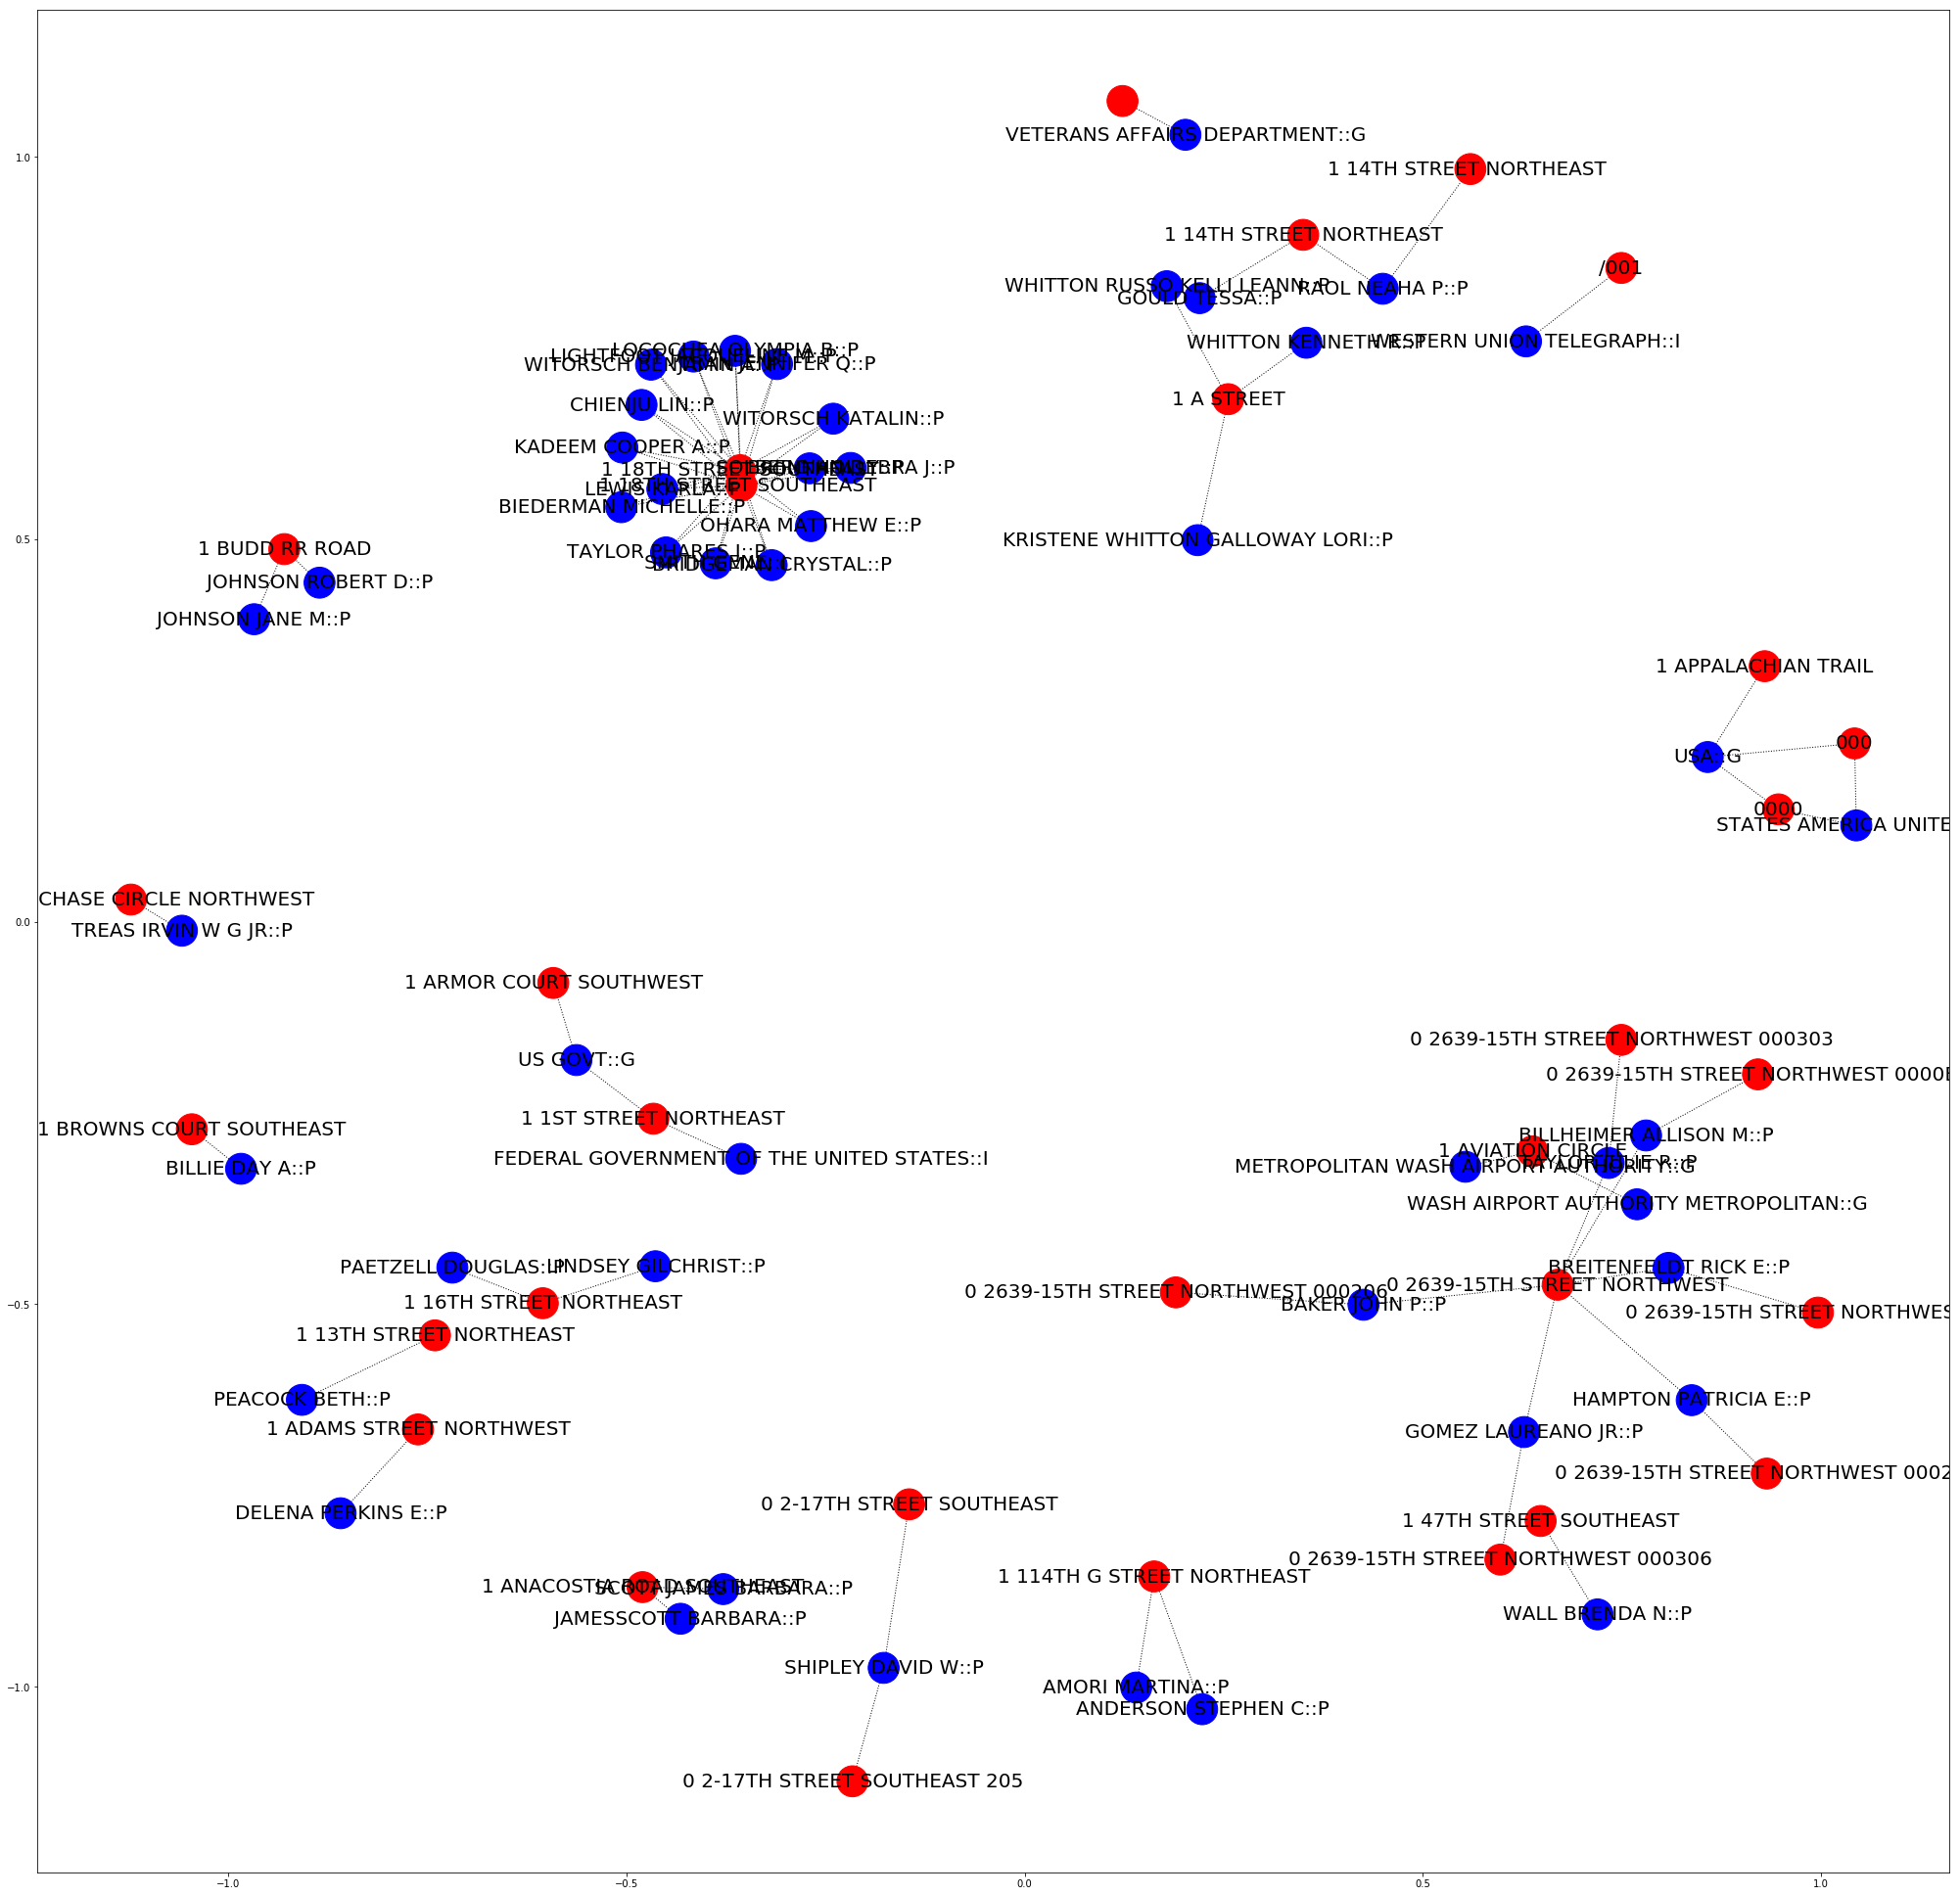

In [71]:
fig = plt.figure(figsize=(35, 35))

pos = nx.spring_layout(G, scale=1, k=2/np.sqrt(G.order()))

# differentiate nodes based on color
color_map = []
for node in G:
    if '::' in node:
        color_map.append('blue')
    else: 
        color_map.append('red')

# reposition labels
label_ratio = 1/8
pos_labels = {} 
for aNode in G.nodes():
    # get node position
    x, y = pos[aNode]
    
    # get node's neighborhood centroid
    N = G[aNode]
    cx = sum(map(lambda x:pos[x][0], N)) / len(pos)
    cy = sum(map(lambda x:pos[x][1], N)) / len(pos)
    
    # getcentroid slope
    slopeY = (y-cy)
    slopeX = (x-cx)
    
    # reposition 
    pos_labels[aNode] = (x+slopeX*label_ratio, y+slopeY*label_ratio)


nx.draw_networkx(G, pos=pos_labels, 
                 font_size=20, 
                 node_color=color_map,
                 style='dotted',
                 node_size=1000)

#plt.savefig('DC_100_nodes_graph.png')
plt.show()

In [ ]:
label_ratio = 1/100
pos_labels = {} 

# repositioning
for aNode in G.nodes():
    # get node position
    x, y = pos[aNode]
    
    # get node's neighborhood centroid
    N = G[aNode]
    cx = sum(map(lambda x:pos[x][0], N)) / len(pos)
    cy = sum(map(lambda x:pos[x][1], N)) / len(pos)
    
    # getcentroid slope
    slopeY = (y-cy)
    slopeX = (x-cx)
    
    # reposition 
    pos_labels[aNode] = (x+slopeX*label_ratio, y+slopeY*label_ratio)
